In [ ]:
# Install in cmd the 64bit version of Python 3, for instance from https://www.python.org. Then run:

    # pip install -U scikit-learn
    # pip install -U scikit-learn scipy matplotlib
    # pip install -U scikit-learn scipy ensemble
    # pip install --upgrade pandas

# In order to check your installation you can use

    # python -m pip show scikit-learn # to see which version and where scikit-learn is installed
    # python -m pip freeze # to see all packages installed in the active virtualenv
    # python -c "import sklearn; sklearn.show_versions()"

In [5]:
# Imports (numpy,pandas,scipy, math, matplotlib)

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import sklearn

# Estimators

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Model Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation

from sklearn.model_selection import train_test_split
    # from sklearn.cross_validation import train_test_split

In [6]:
# Import the data

rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Examine the structure of your data and ensure everything was imported in the format you need for work.

rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [8]:
rawData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Selecting Data

## 1. Select the features

In [11]:
# Features

features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


## 2. Select the Dependent Variable

In [13]:
# Dependent variable

depVar = rawData['PAY_AMT6']

## 3. Establish the training set for the X-variables or Feature space (first 1000 rows: only for this example you will still follow a 70/30 split for your final models)

In [14]:
# Training Set (Feature Space: X Training)

X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


## 4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

In [15]:
# Dependent Variable Training Set (y Training)

y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

## 5. Establish the testing set for the X-Variables or Feature space

In [16]:
# Testing Set (X Testing)

X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


## 6. Establish Ground truth 

In [20]:
# Ground Truth (y_test) 

y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

# Cross Validation

In [ ]:
## In previous courses you used various methods for implementing cross validation to help prevent overfitting. 
## In Sci-Kit Learn there is a pre-built function that makes this very easy to implement. Here is a quick example:

## As we have already noted we'll be using four 'divisions' of the data:

## - Training Data is divided into two parts: X-train and y_train
## - Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)

In [21]:
## In order to use these for Cross Validation we must first import the package (or module) into our project as follows:

from sklearn.model_selection import train_test_split
    # from sklearn.cross_validation import train_test_split

In [22]:
# Now we can implement Cross Validation anytime we need to by simply running the following on the X and Y training sets:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [23]:
# We can also use the shape function to double check that the split was made as needed:

X_train.shape, X_test.shape

((750, 11), (250, 11))

In [24]:
# Since we've already established out training and testing sets we can easily cross validate by 
# using sklearn.cross_validation on our datasets as follows:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

# Building the Models and Choosing the Rigth Model

## 1. If you haven't already done so start by importing the modules we need for this step in a new notebook:

In [25]:
# Imports: numpy,pandas,scipy, math, matplotlib

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [27]:
# Estimators

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [28]:
# Model Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [29]:
# Cross Validation

from sklearn.model_selection import train_test_split
    # from sklearn.cross_validation import train_test_split

## 2. Establish variables that you will use for defining each model. As you can see we've established three different models with the individual variable names; we'll refer to each when we build the model later.

In [30]:
# Models

modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

## 3. While not mandatory, it is a good idea to establish a variable specifically for your features so you will have full control over what is being used for training. 

In [31]:
#Features

features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


## 4. Again while not mandatory, but it might be a good idea to validate that the correct column is being used for the dependent variable:

In [32]:
# Dependent Variable

print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


## 5. Use the model variables you established in step 2  pass the training data to them in the following format (You used the train function from caret for this when you worked in R):

In [33]:
# model.fit(X_train,y_train)

# Do this for three different models as follows:

## 6. Random Forest

In [34]:
modelRF.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## 7. Support Vector Regression

In [35]:
modelSVR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## 8. Linear Regression

In [36]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# This concludes the process of building three Regression models using Python and Sci-Kit Learn! You'll note the process 
# is similar to what you've done previously in R.

# Choosing the Right Model

In [38]:
# As you are aware it is often necessary to build more than one model in order to find the most appropriate one for the job.
# Sci-Kit Learn has a function that will 'score' each model for appropriateness based on the algorithm that was used to 
# build it; models with the highest scores should be used to make predictions. The metric we will use to check for proper 
# model usage is called the cross_val_score.

# To use this function, we need to verify the library has been imported as needed. Examine the cell of your notebook where 
# your imports live and verify the following has been added or is already present:

from sklearn.model_selection import cross_val_score

In [39]:
# Then simply pass each trained model and the training sets to the function to obtain the training score. 
# Here is an example from the Random Forest model:

print(cross_val_score(modelRF, X_train, y_train)) 

[-0.09064811 -0.09263332  0.03874093]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
# These values correspond to the the following:

# 1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
# 2nd value: The time for fitting the estimator on the train set for each cv split.
# 3rd Value:  The time for scoring the estimator on the test set for each cv split. 

In [40]:
print(cross_val_score(modelSVR, X_train, y_train)) 

[-0.07514805 -0.05096798 -0.02201756]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

In [41]:
print(cross_val_score(modelLR, X_train, y_train)) 

[-1.69382032 -1.79083425  0.06106382]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
# In this example Random Forest had the highest score so we'll check the R-Squared value of the trained model and see how 
# it fit the data.  

# In R you learned to use different built-in functions within packages to evaluate models using metrics like Accuracy, 
# Kappa, RMSE and R Squared. The process works very much the same way in Sci-Kit Learn except every individual algorithm 
# might has its own type of metric to measure the trained model. Most of the time this follows the normal R Squared
# convention (in the case of Regression), but sometimes it doesn't making it a good idea to check the Estimator reference
# to see what type(s) of scoring method(s) exist for measuring trained models. In this case we are building a model with 
# RandomForest regression, which has a simple score method that we can use on the trained model:

# TIP: The default metric for model.score for Regression models in Sci-Kit Learn is R-Squared. 

In [ ]:
# Now that you know how to score each model lets do so with the three you've already created (Note: we've duplicated the
# model fitting, but it isn't necessary - its just shown for clarity:

## 1. Random Forest Regression Model Fitting and Scoring

In [42]:
# Model Fitting

modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))

[-0.85181629  0.13612189  0.00729143]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [43]:
modelRF.score(X_train,y_train)

0.6922601503820134

## 2.Support Vector Regression Model Fitting and Scoring

In [44]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 

[-0.07514805 -0.05096798 -0.02201756]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

In [45]:
modelSVR.score(X_train,y_train)

-0.025991686837196545

## 3. Linear Regression Model Fitting and Scoring

In [46]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 

[-1.69382032 -1.79083425  0.06106382]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [47]:
modelLR.score(X_train,y_train)

0.5965539130170299

# Making Predictions

In [48]:
# Now that you have chosen a model, let's use it to make predictions. This process is almost identical to what you have 
# done in R (here is an example from the Random Forest model your previously created:

predictions = modelRF.predict(X_test)

# Evaluating the Results

## 1. The sklearn.metrics Object is the main object that contains almost all of the metric functions you will need. 

In [49]:
# Verify that the first two are in your imported list of libraries (you'll see some familiarity in their names):

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
# Since this is a Regression problem you will use RMSE and R squared to measure the trained model. 
# So why didn't you import a metric called RMSE? RMSE is just the Square Root of MSE (mean squared error) so you will also 
# need to ensure that we've also included the sqrt function from the math library during import:

from math import sqrt

## 2. Now you can use the sqrt function and the mean_squared_error function to compose your own function for calculating RMSE:

In [51]:
rmse = sqrt(mean_squared_error(y_test, predictions))

## 3. Next, establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared as follows:

In [52]:
predRsquared = r2_score(y_test,predictions)

## 4. Here is how it all looks together:

In [53]:
# Make Predictions Random Forest

predictionsRF = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.510
RMSE: 10601.475


In [54]:
# Make Predictions Support Vector Regression

predictionsSVR = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.510
RMSE: 10601.475


In [55]:
# Make Predictions Linear Regression

predictionsLR = modelLR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.510
RMSE: 10601.475


# Plotting the Results

In [ ]:
# The final step in the model building process (unless the model will be deployed) is often to plot a comparison between 
# the known values in the test set and the predictions made by the model.

## 5. To do this we can create a simple scatter plot using matplotlib as we've done previously. 

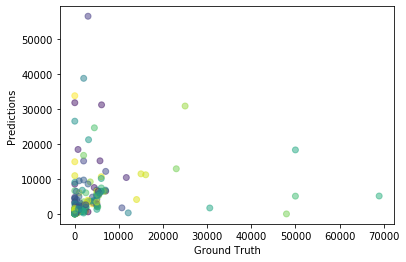

In [56]:
# Plotting the Results Random Forest

c=np.random.random(len(predictionsRF))
plt.scatter(y_test, predictionsRF,c=c, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

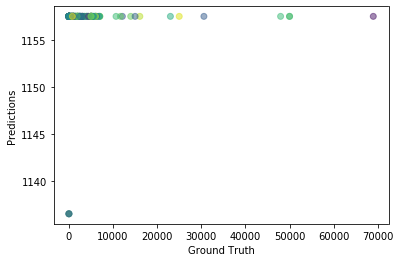

In [57]:
# Plotting the Results Support Vector Regression

c=np.random.random(len(predictionsSVR))
plt.scatter(y_test, predictionsSVR,c=c, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

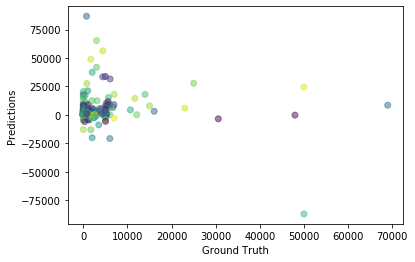

In [58]:
# Plotting the Results Linear Regression

c=np.random.random(len(predictionsLR))
plt.scatter(y_test, predictionsLR,c=c, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# ------------------------ *END OF PLAN OF ATTACK* ------------------------

# Credit Card Default Prediction & Analysis

In [ ]:
# Let's look at the data. Since our dependent variable is categorical, we can split the distributions by 
# "default/not-default" to look at the characteristics of the default/not-default groups

In [59]:
import seaborn as sns
import scipy.stats as stats

In [60]:
rawData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [67]:
output = 'default payment next month'

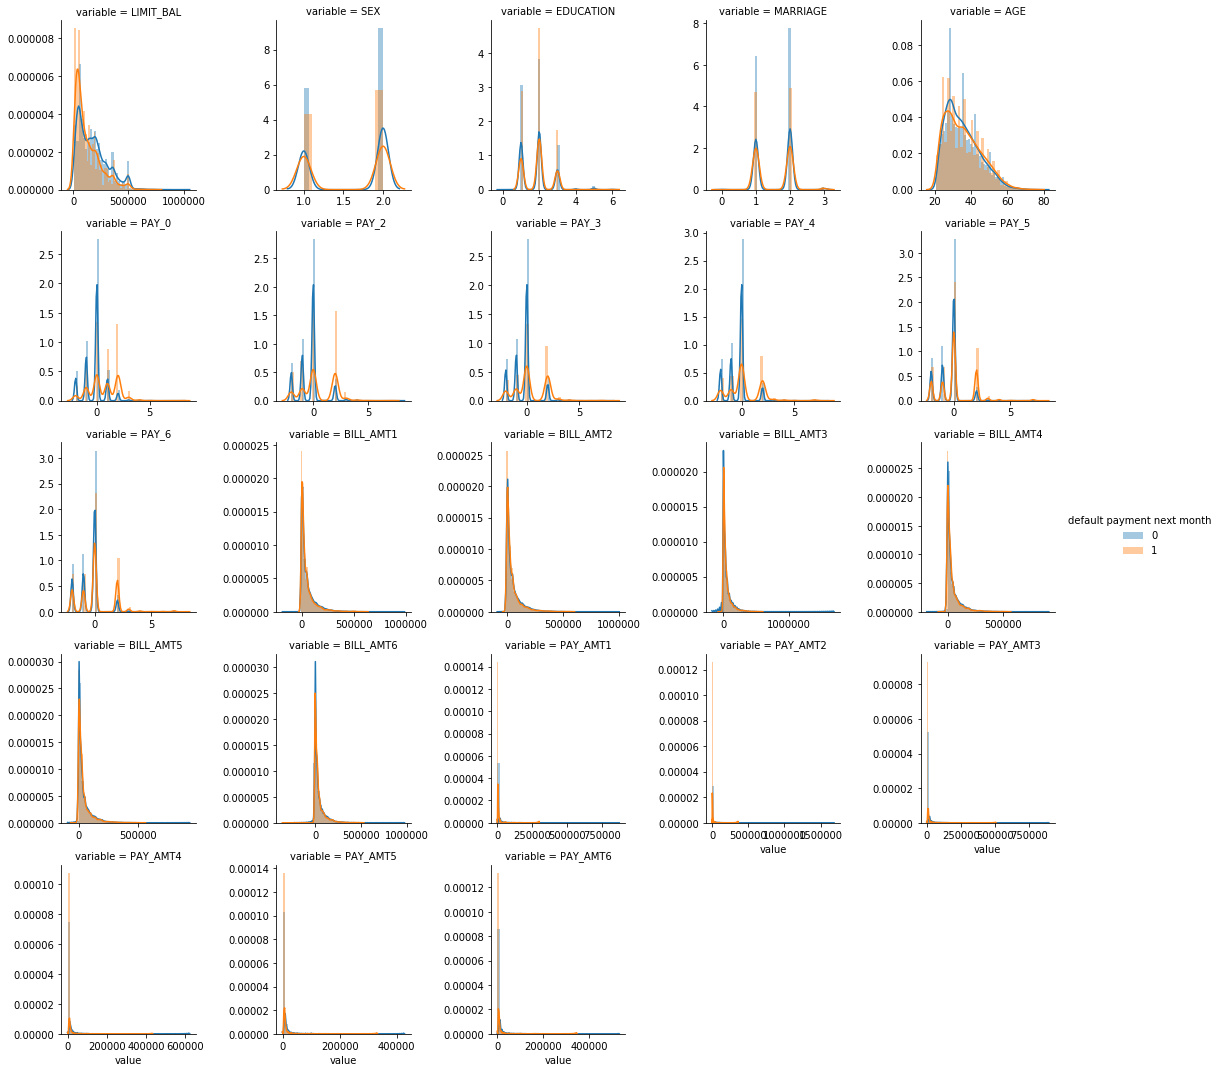

In [68]:
# Let's do a little EDA

cols = [ f for f in rawData.columns if rawData.dtypes[ f ] != "object"]
cols.remove( "ID")
cols.remove( output )

f = pd.melt( rawData, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

## Observations:

In [ ]:
# 1. Defaults have a higher proportion of Lower LIMIT_BAL values
# 2. NonDefaults have a higher proportion of Females (Sex=2)
# 3. NonDefaults have a higher proportion of MoreEducated (EDUCATION=1 or 2)
# 4. NonDefaults have a higher proportion of Singles (MARRIAGE=2)
# 5. NonDefaults have a higher proportion of people 30-40years
# 6. NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables (this means that being current or ahead 
# of payments is associated with not defaulting in the following month). This is a strong relationship as the distribution
# are more separated - so we expect the PAY_X to be important!

# (Clearly we're going to have to transform those dollar amounts in the PAY_AMTX and BILL_AMTX variables.)

## How significant are these relationships? Given the observed data, is it possible we're imagining relationships when they're not really that strong?

In [69]:
def ChiSquaredTestOfIndependence( df, inputVar, Outcome_Category ):
    # Useful to have this wrapped in a function
    # The ChiSquaredTest of Independence - 
    # has a null hypothesis: the OutcomeCategory is independent of the inputVar
    # So we create a test-statistic which is a measure of the difference between 
    # "expected" i.e. what we WOULD observe if the OutcomeCategory WAS independent of the inputVar
    # "observed" i.e. what the data actually shows
    # the p-value returned is the probability of seeing this test-statistic if the null-hypothesis is true
    Outcome_Category_Table = df.groupby( Outcome_Category )[ Outcome_Category ].count().values
    Outcome_Category_Ratios = Outcome_Category_Table / sum( Outcome_Category_Table )
    possibleVals = df[inputVar].unique()
    observed = []
    expected = []
    for possible in possibleVals:
        countsInCategories = df[ df[ inputVar ] == possible ].groupby( Outcome_Category )[Outcome_Category].count().values
        if( len(countsInCategories) != len( Outcome_Category_Ratios ) ):
            print("Error! The class " + str( possible) +" of \'" + inputVar + "\' does not contain all values of \'" + Outcome_Category + "\'" )
            return
        elif( min(countsInCategories) < 5 ):
            print("Chi Squared Test needs at least 5 observations in each cell!")
            print( inputVar + "=" + str(possible) + " has insufficient data")
            print( countsInCategories )
            return
        else:
            observed.append( countsInCategories )   
            expected.append( Outcome_Category_Ratios * len( df[df[ inputVar ] == possible ]))
    observed = np.array( observed )
    expected = np.array( expected )
    chi_squared_stat = ((observed - expected)**2 / expected).sum().sum()
    degOfF = (observed.shape[0] - 1 ) *(observed.shape[1] - 1 ) 
    #crit = stats.chi2.ppf(q = 0.95,df = degOfF) 
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=degOfF)
    print("Calculated test-statistic is %.2f" % chi_squared_stat )
    print("If " + Outcome_Category + " is indep of " + inputVar + ", this has prob %.2e of occurring" % p_value )
    #t_stat, p_val, doF, expArray = stats.chi2_contingency(observed= observed, correction=False)
    #print("Using built-in stats test: outputs")
    #print("test-statistic=%.2f, p-value=%.2f, degsOfFreedom=%d" % ( t_stat, p_val, doF ) )

## 1. SEX

In [71]:
ChiSquaredTestOfIndependence( rawData, "SEX", output )

Calculated test-statistic is 47.91
If default payment next month is indep of SEX, this has prob 4.47e-12 of occurring


## 2. EDUCATION

In [73]:
# Ok. So "default" is not independent of "SEX".

ChiSquaredTestOfIndependence( rawData, "EDUCATION", output )

Error! The class 0 of 'EDUCATION' does not contain all values of 'default payment next month'


In [75]:
# There aren't enough values in the Education class =0. We'll probably find the same for the non-typical-looking values 
# Education = 4, 5, 6. How many of each do we have?

print("We have %d with EDUCATION=0" % len(rawData.loc[ rawData["EDUCATION"]==0]))
print("We have %d with EDUCATION=4" % len(rawData.loc[ rawData["EDUCATION"]==4]))
print("We have %d with EDUCATION=5" % len(rawData.loc[ rawData["EDUCATION"]==5]))
print("We have %d with EDUCATION=6" % len(rawData.loc[ rawData["EDUCATION"]==6]))

We have 14 with EDUCATION=0
We have 123 with EDUCATION=4
We have 280 with EDUCATION=5
We have 51 with EDUCATION=6


In [76]:
# Since we have 30k samples, let's just put these non-typical Education instances all into the EDUCATION=4 class and continue 

rawData["EDUCATION_Corr"] = rawData["EDUCATION"].apply( lambda x: x if ((x>0) and (x<4)) else 4 )
ChiSquaredTestOfIndependence( rawData, "EDUCATION_Corr", output ) 
cols.remove("EDUCATION")
cols.append("EDUCATION_Corr")

Calculated test-statistic is 160.41
If default payment next month is indep of EDUCATION_Corr, this has prob 0.00e+00 of occurring


## 3. MARRIAGE

In [78]:
ChiSquaredTestOfIndependence( rawData, "MARRIAGE", output ) 

Calculated test-statistic is 35.66
If default payment next month is indep of MARRIAGE, this has prob 8.83e-08 of occurring


In [ ]:
# Ok. So default is not independent of EDUCATION_Corr nor independent of MARRIAGE.

# I find it useful to separate the variables into "quantitative" vs "qualitative" and also to keep track of those that 
# I've transformed (instead of overwriting them).

In [86]:
# The quantitative vars:

quant = ["LIMIT_BAL", "AGE"]

In [88]:
# The qualitative but "Encoded" variables (ie most of them)

cols = [ f for f in rawData.columns if rawData.dtypes[ f ] != "object"]
qual_Enc = cols
qual_Enc.remove("LIMIT_BAL")
qual_Enc.remove("AGE")

In [ ]:
# And the PAY_ variables? We can see those are important, but we'll transform the BILL_AMT and PAY_AMT variables from NT 
# Dollars to Log(NT Dollars)

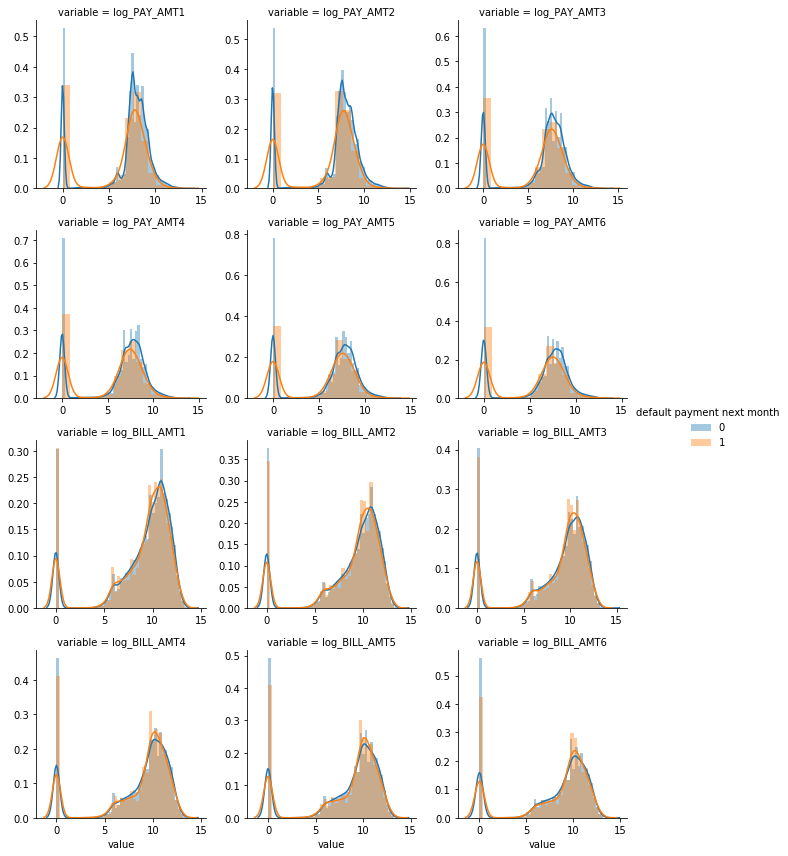

In [89]:
logged = []
for ii in range(1,7):
    qual_Enc.remove("PAY_AMT" + str( ii ))
    rawData[ "log_PAY_AMT" + str( ii )]  = rawData["PAY_AMT"  + str( ii )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_PAY_AMT" + str( ii ) )

for ii in range(1,7):
    qual_Enc.remove("BILL_AMT" + str( ii ))
    rawData[ "log_BILL_AMT" + str( ii )] = rawData["BILL_AMT" + str( ii )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_BILL_AMT" + str( ii ) )

f = pd.melt( rawData, id_vars=output, value_vars=logged)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=3, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [ ]:
# It looks like higher Log PAY_AMT is associated with slightly less default.

# So now we have quant variables, qual_Enc variables and logged variables. Let's check correlations with the output variable:

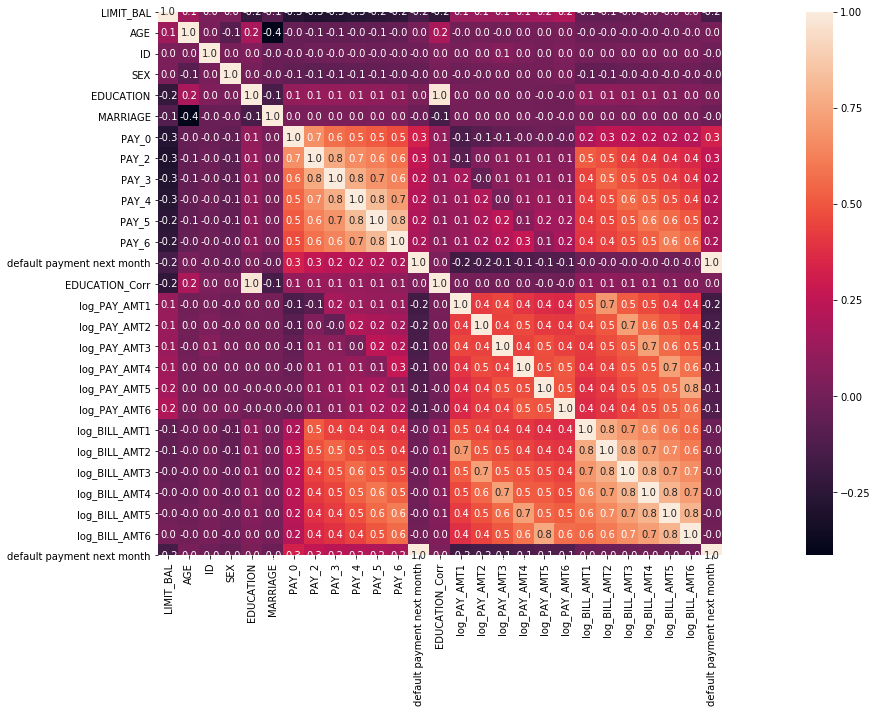

In [91]:
features = quant + qual_Enc + logged + [output]
corr = rawData[features].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" ) 

In [ ]:
# So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and 
# Log_PAY_AMT variables.

# To make predictions about whether a customer is likely to default - we'll train a number of different classifiers and 
# see how well they perform. As usual, we start by splitting the data into train/test sets and rescaling.

In [92]:
features = quant + qual_Enc + logged   
X = rawData[features].values    
y = rawData[ output ].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )

# We'll need some metrics to evaluate our models

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# We don't expect the data to be linearly separable - so we'll start with the RandomForest classifier and kernel-SVM

## Random Forest 

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train )
y_pred = classifier.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))


Accuracy on Test Set for RandomForest = 1.00
Mean RandomForest CrossVal Accuracy on Train Set 1.00, with std=0.00


## Support Vector Regression

In [94]:
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf")
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresSVC = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

Accuracy on Test Set for kernel-SVM = 1.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Mean kernel-SVM CrossVal Accuracy on Train Set 1.00, with std=0.00


In [ ]:
# I'll check some of the other classifiers - but we don't expect they will do better

## Logistic Regression 

In [95]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit( X_train, y_train )
y_pred = classifier2.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresLR = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on Test Set for LogReg = 1.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Mean LogReg CrossVal Accuracy on Train Set 1.00, with std=0.00


## Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_pred = classifier3.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))

Accuracy on Test Set for NBClassifier = 1.00
Mean NaiveBayes CrossVal Accuracy on Train Set 1.00, with std=0.00


## K-NEIGHBOURS 

In [97]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train )
y_pred = classifier4.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for KNeighborsClassifier = 0.99
Mean KN CrossVal Accuracy on Train Set Set 1.00, with std=0.00


# Conclusion

In [ ]:
# Using a kernel-SVM classifier, we can predict with ~82% accuracy, whether a customer is likely to default next month.

# The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the 
# PAY_AMTX (amount paid in previous months).

# Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely 
# to make payments on time.